In [1]:
print(__doc__)


Automatically created module for IPython interactive environment


In [2]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [3]:
df = pd.read_csv('./nyt-frame.csv', header = 0)

In [4]:
original_headers = list(df.columns.values)

In [5]:
print(original_headers)

['Unnamed: 0', 'class.labels', 'X.', 'X.d', 'X.nd', 'X.s', 'X.th', 'X.this', 'a', 'abandoned', 'abc', 'ability', 'able', 'about', 'above', 'abroad', 'absorbed', 'absorbing', 'abstract', 'abstraction', 'abstractions', 'abundance', 'academic', 'academy', 'accents', 'accept', 'access', 'accessible', 'acclaimed', 'accommodate', 'accompanied', 'accompanying', 'according', 'accordingly', 'account', 'accounted', 'accused', 'achieved', 'achievement', 'acknowledge', 'acknowledged', 'acquired', 'acquisition', 'acquisitions', 'acre', 'across', 'acrylics', 'act', 'acted', 'acting', 'action', 'actions', 'active', 'activities', 'actor', 'actors', 'actress', 'acts', 'actually', 'adam', 'adams', 'adamss', 'adaptation', 'add', 'added', 'adding', 'addition', 'additional', 'address', 'addresses', 'adds', 'adhering', 'adjacent', 'administration', 'admired', 'admission', 'admits', 'adopted', 'ads', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventurous', 'advertisements', 'advertising', 'a

In [9]:
df.head()

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.0,0.0,0.048151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.loc[:,'class.labels']

0        art
1        art
2        art
3        art
4        art
       ...  
97     music
98     music
99     music
100    music
101    music
Name: class.labels, Length: 102, dtype: object

In [11]:
df.size

452166

In [12]:
df.shape

(102, 4433)

In [13]:
dff = df._get_numeric_data()

In [14]:
df.shape

(102, 4433)

In [15]:
data = df.iloc[:,9:]

In [16]:
array = data.as_matrix()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [17]:
array.shape

(102, 4424)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()

In [20]:
X_pca = pca.fit_transform(array)
X_pca.shape

(102, 102)

In [21]:
y = df.loc[:,'class.labels']
reds = y == 'art'
blues = y == 'music'

In [24]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['swiss' 'fled' 'effect' 'task' 'contributes' 'space' 'splash' 'filter'
 'knocked' 'budget' 'anthony' 'pope' 'august' 'seven' 'reward' 'evening'
 'includes' 'message' 'allowed' 'kings']


In [25]:
indices = np.random.choice(array.shape[0], 2, replace=False)
sample = array[indices,:]

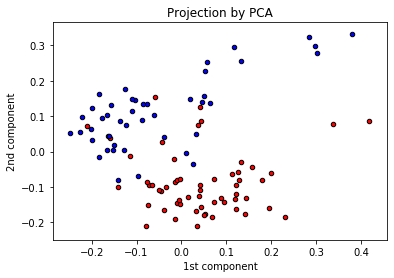

In [26]:
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red", s=20, edgecolor='k')
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue",s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

In [27]:
k = 15
attributes = df.columns.values[9:]
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(attributes[sorted[i]] + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(attributes[sorted[i]] + ':' + repr(pc1[sorted[i]]))
pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(attributes[sorted[i]] + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(attributes[sorted[i]] + ':' + repr(pc2[sorted[i]]))

----------PC1-------------
music:-0.11211617341838395
trio:-0.08780731643381652
theater:-0.07404600988801327
orchestra:-0.0692689982675331
composers:-0.05859060967058615
opera:-0.055553640967300456
theaters:-0.051177961569890254
m:-0.04902545227080574
program:-0.04900138329029363
players:-0.04881882614499719
festival:-0.048123331390177826
east:-0.04794086893749091
y:-0.047911748359542664
jersey:-0.04603235412282278
symphony:-0.0449307762546804
--------------------------
she:0.26127391890531615
her:0.24529311441720691
ms:0.20211292705699732
i:0.15028278883843363
said:0.13360556763625306
mother:0.10687219119361745
cooper:0.1030093920502291
my:0.09432521211958254
painting:0.08788709841748907
process:0.0711963014734391
paintings:0.0698848352950017
im:0.06857385461154242
mrs:0.06562096808145772
he:0.06531001248089244
me:0.0637927825016148
----------PC2-------------
art:-0.15431673143840427
museum:-0.12089946277617686
images:-0.09522680440744599
artists:-0.09263497758879567
donations:-0.0776

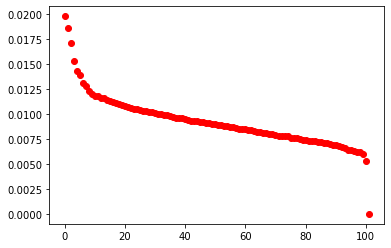

In [28]:
variance = pca.explained_variance_
plt.plot(variance, 'ro')
plt.show()

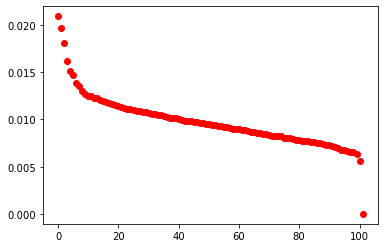

0.15773478029003488


In [29]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))